## Estimación de edad de personas

#### Librerias

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time

### Datos

Lo primero que haremos será obtener los datos descritos en el enunciado.

In [2]:
eventrain = sio.loadmat("AgeGenderClassification/eventrain.mat")
eventest = sio.loadmat("AgeGenderClassification/eventest.mat")
trainData = eventrain['trcoll'][0][0]
testData = eventest['tecoll'][0][0]

In [3]:
print ("Instancias de entrenamiento:", trainData[1].shape[0])
print ("Instancias de testeo:", testData[1].shape[0])

Instancias de entrenamiento: 3500
Instancias de testeo: 1050


#### Comprensión de los datos

Podemos notar que vienen 11 valores dentro de los conjuntos, los cuales pueden inferirse en base a sus tamaños gracías al README proporcionado en el enunciado, o bien, analizando sus valores.

Primero notaremos los tamaños de los 11 valores, y veremos si estos son identicos o necesitan reordenamiento.

In [4]:
for i in range(11):
    print (i, trainData[i].shape, testData[i].shape)

0 (3500, 14) (1050, 14)
1 (3500, 1) (1050, 1)
2 (3500, 1) (1050, 1)
3 (3500, 37) (1050, 37)
4 (3500, 600) (1050, 600)
5 (3500, 2989) (1050, 2989)
6 (3500, 1) (1050, 1)
7 (3500, 1) (1050, 1)
8 (1, 3500) (1, 1050)
9 (3500, 7) (1050, 7)
10 (3500, 2) (1050, 2)


Son idénticos y podemos identificar algunos de los valores.

| ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10  |
| -  | - | - | - | - | - | - | - | - | - | - | -   |
| Value | genFeat | 1 | 2 | ffcoefs | faceGist | 5 | 6 | 7 | 8 | facePosSize | 10 |


Para identificar los otros valores revisaremos que valores pueden tomar los *onehot vectors*.

In [5]:
print ('ID 1:', np.unique(trainData[1].T))
print ('ID 2:', np.unique(trainData[2].T))
print ('ID 6:', np.unique(trainData[6].T))
print ('ID 7:', np.unique(trainData[7].T))
print ('ID 8:', np.unique(trainData[8]))

ID 1: [ 1  5 10 16 28 51 75]
ID 2: [1 2]
ID 6: [0.00990099 0.02970297 0.03960396 0.04950495 0.05940594 0.06930693
 0.07920792 0.08910891 0.0990099  0.10891089 0.11881188 0.12871287
 0.13861386 0.14851485 0.15841584 0.16831683 0.17821782 0.18811881
 0.1980198  0.20792079 0.21782178 0.22772277 0.23762376 0.24752475
 0.25742574 0.26732673 0.27722772 0.28712871 0.2970297  0.30693069
 0.31683168 0.32673267 0.33663366 0.34653465 0.35643564 0.36633663
 0.37623762 0.38613861 0.3960396  0.40594059 0.41584158 0.42574257
 0.43564356 0.44554455 0.45544554 0.46534653 0.47524752 0.48514851
 0.4950495  0.5049505  0.51485149 0.52475248 0.53465347 0.54455446
 0.55445545 0.56435644 0.57425743 0.58415842 0.59405941 0.6039604
 0.61386139 0.62376238 0.63366337 0.64356436 0.65346535 0.66336634
 0.67326733 0.68316832 0.69306931 0.7029703  0.71287129 0.72277228
 0.73267327 0.74257426 0.75247525 0.76237624 0.77227723 0.78217822
 0.79207921 0.8019802  0.81188119 0.82178218 0.83168317 0.84158416
 0.85148515 0.86

De esto logramos inferir que son los valores *ageClass*, *genClass*y *faceData* de los id 1, 2 y 8 respectivamente. Ahora viendo los valores de las variables restantes.

In [6]:
print ("6:", trainData[6].T)
print ("7:", trainData[7].T)
print ("10:", np.unique(trainData[10]))

6: [[0.74257426 0.79207921 0.2970297  ... 0.57425743 0.5049505  0.62376238]]
7: [[31.96438356 30.29863014 28.38356164 ...  2.85205479  3.73972603
   1.78082192]]
10: [   1    2    3 ... 5631 5633 5646]


Lo que no muestras nada representativo más que 6 sea una variable que describe una distribución de probabilidad. Ahora bien, al analizar, el 5, notamos inmediatamente que es una imagen debido a sus valores y dimensiones. (61x49 = 2989)

In [7]:
np.unique(trainData[5])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
img1 = trainData[5][19]
img = np.array([img1[i*61:(i+1)*61] for i in range(49)])

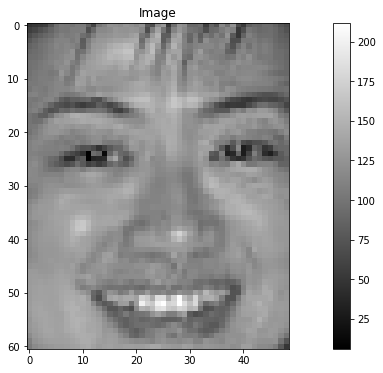

In [9]:
plt.title('Image')
plt.imshow(img.T,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((16,6))
plt.show()

Con esto llegamos a los siguientes valores:

| ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10  |
| -  | - | - | - | - | - | - | - | - | - | - | -   |
| Value | genFeat | ageClass | genClass | ffcoefs | faceGist | fimg | 6 | 7 | faceData | facePosSize | 10 |

Ahora definiremos unas funciones para el manejo de estas miniaturas

In [10]:
def toVector(img):
    result = np.array([], dtype="uint8")
    for col in img.T:
        result = np.append(result, col)
    return result

def toImg(vector):
    return np.array([vector[(i)*(61):(i+1)*(61)] for i in range(49)]).T

### Identificación del problema

A modo de realizar un breve análisis sobre los atributos posibles, considerando las descripciones de los mismos, y las estructuras señaladas en el *Readme*, son pocas las variables que intuitivamente podrían ayudarnos a colaborar en una buena predicción, de todas formas realizaremos un analisis objetivo utilizando la mayor cantidad de atributos y seleccionando los que otorguen mayor información.

Consideremos que nos encontramos en un problema de **clasificación multi-clase**. Esto se debe a que nuestras instancias están separadas por categorias la cual resulta parecido a un promedio del rango etario al cual se pertenece. También podríamos querer intentar realizar una regresión sobre los datos de forma que tomemos la clase más cercana a la predicción.

A todos nuestros procedimientos los iremos comparando además con una concepción intuitiva que es tomar en cuenta la imagen **fimg** y el género **genClass** de la persona.

Consideremos que $X \in \mathbb{R}^{d\times w}$ es nuestra matriz de ejemplos con $d \in \mathbb{R}$ instancias y $w \in \mathbb{R}$ atributos.

In [11]:
def dataToSample(data, args):
    d = data[1].shape[0]
    X = np.array([np.array([], dtype="uint8") for i in range(d)])
    for i in args:
        genClass = False
        new = data[i] if (i != 8) else (data[i].T)
        X = np.array([ np.append(X[k], new[k]) for k in range(d)])
    return X

def getGT(data, pos):
    return data[pos]

Consideremos los siguientes identificadores de conjuntos, de estos valores, obviaremos el valor *faceData* debido a que no es un valor numérico y representarlo como tal no nos aporta ningún valor de información.

|  ID  |  Valor |
|------|--------|
|  0   | {fimg} |
|  1   | {fimg, genClass} |
|  2   | All - {faceData} |
|  3   | {fimg} |

El conjunto 3, es un conjunto auxiliar para realizar otros experimentos. Recordemos ademas que nuestras etiquetas están configuradas de la siguiente forma:

| Label | 1 | 5 | 10 | 16 | 28 | 51 | 75 |
|-------|---|---|----|----|----|----|----|
| Age Range | 0-2 | 3-7 | 8-12 | 13-19 | 20-36 | 37-65 | 75 o más |

In [12]:
Y_train = getGT(trainData, 1)
Y_test = getGT(testData, 1)
X_train_0 = dataToSample(trainData, [5])
X_train_3 = dataToSample(trainData, [5])
X_train_1 = dataToSample(trainData, [5, 2])
X_train_2 = dataToSample(trainData, [0, 2, 3, 4, 5, 6, 7, 9, 10])
X_test_0 = dataToSample(testData, [5])
X_test_3 = dataToSample(testData, [5])
X_test_1 = dataToSample(testData, [5, 2])
X_test_2 = dataToSample(testData, [0, 2, 3, 4, 5, 6, 7, 9, 10])

In [13]:
print ('Shapes')
print ('Y_train: ', Y_train.shape)
print ('Y_test: ', Y_test.shape)
print ('X_train_0: ', X_train_0.shape)
print ('X_train_1: ', X_train_1.shape)
print ('X_train_2: ', X_train_2.shape)
print ('X_test_0: ', X_test_0.shape)
print ('X_test_1: ', X_test_1.shape)
print ('X_test_2: ', X_test_2.shape)

Shapes
Y_train:  (3500, 1)
Y_test:  (1050, 1)
X_train_0:  (3500, 2989)
X_train_1:  (3500, 2990)
X_train_2:  (3500, 3652)
X_test_0:  (1050, 2989)
X_test_1:  (1050, 2990)
X_test_2:  (1050, 3652)


**Continuamos** con una estandarización de los datos, lo cual es importantisimo de realidad debido a los distintos valores posibles que tienen todos estos atributos. Si bien 0 no debiese tener dificultades debido a que es solo los valores de la imagen, los escalamos de todas formas para su primera utilización.

In [14]:
from sklearn import preprocessing as prp
std_0 = prp.StandardScaler()
std_1 = prp.StandardScaler()
std_2 = prp.StandardScaler()

In [15]:
std_0.fit(X_train_0)
std_1.fit(X_train_1)
std_2.fit(X_train_2)

X_std_train_0 = std_0.transform(X_train_0)
X_std_test_0 = std_0.transform(X_test_0)
X_std_train_1 = std_1.transform(X_train_1)
X_std_test_1 = std_1.transform(X_test_1)
X_std_train_2 = std_2.transform(X_train_2)
X_std_test_2 = std_2.transform(X_test_2)

Teniendo nuestros datos estandarizados, podemos continuar con  algunas funciones de utilidad, para realizar métricas y una función de discretización del resultado para la regresión lineal.

In [16]:
import sklearn.linear_model as lm
from sklearn.metrics import f1_score, r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
def discretize(predictions):
    for i in range(len(predictions)):
        agep = predictions[i][0]
        if (agep < 2.5):
            predictions[i][0] = 1
        elif (agep < 7.5):
            predictions[i][0] = 5
        elif (agep < 12.5):
            predictions[i][0] = 10
        elif (agep < 19.5):
            predictions[i][0] = 16
        elif (agep < 36.5):
            predictions[i][0] = 28
        elif (agep < 65.5):
            predictions[i][0] = 51
        else:
            predictions[i][0] = 75
    return predictions

### Regresion Lineal



In [18]:
a = time.time()
print ('Entrenado modelo 0')
model_rll0 = lm.LinearRegression().fit(X_std_train_0, Y_train)
b = time.time()
print ('Entrenamiento terminado - {0}[s]\nEntrenando modelo 1'.format(b-a))
model_rll1 = lm.LinearRegression().fit(X_std_train_1, Y_train)
c = time.time()
print ('Entrenamiento terminado - {0}[s]\nEntrenando modelo 2'.format(c-b))
model_rll2 = lm.LinearRegression().fit(X_std_train_2, Y_train)
d = time.time()
print ('Entrenamiento terminado - {0}[s]'.format(d-c))

Entrenado modelo 0
Entrenamiento terminado - 15.042386054992676[s]
Entrenando modelo 1
Entrenamiento terminado - 15.024277687072754[s]
Entrenando modelo 2
Entrenamiento terminado - 20.568862438201904[s]


In [19]:
pred_rll0_tr = model_rll0.predict(X_std_train_0)
pred_rll0_ts = model_rll0.predict(X_std_test_0)
pred_rll1_tr = model_rll1.predict(X_std_train_1)
pred_rll1_ts = model_rll1.predict(X_std_test_1)
pred_rll2_tr = model_rll2.predict(X_std_train_2)
pred_rll2_ts = model_rll2.predict(X_std_test_2)

In [20]:
pred_rll0_tr_d = discretize(pred_rll0_tr)
pred_rll0_ts_d = discretize(pred_rll0_ts)
pred_rll1_tr_d = discretize(pred_rll1_tr)
pred_rll1_ts_d = discretize(pred_rll1_ts)
pred_rll2_tr_d = discretize(pred_rll2_tr)
pred_rll2_ts_d = discretize(pred_rll2_ts)

In [21]:
f1_tr0 = f1_score(Y_train, pred_rll0_tr_d, average='micro')
f1_ts0 = f1_score(Y_test, pred_rll0_ts_d, average='micro')
f1_tr1 = f1_score(Y_train, pred_rll1_tr_d, average='micro')
f1_ts1 = f1_score(Y_test, pred_rll1_ts_d, average='micro')
f1_tr2 = f1_score(Y_train, pred_rll2_tr_d, average='micro')
f1_ts2 = f1_score(Y_test, pred_rll2_ts_d, average='micro')

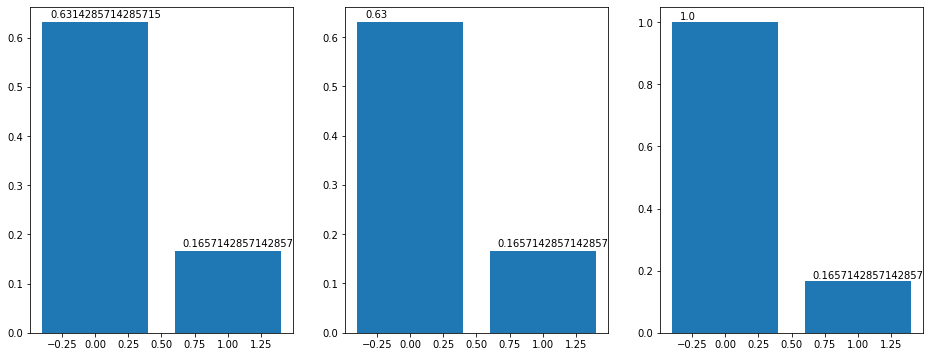

In [22]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [f1_tr0, f1_ts0], x = list(range(2)))
x.text(y = f1_tr0+0.01, x = 0-.34, s = str(f1_tr0))
x.text(y = f1_ts0+0.01, x = 1-.34, s = str(f1_ts0))
y.bar(height = [f1_tr1, f1_ts1], x = list(range(2)))
y.text(y = f1_tr1+0.01, x = 0-.34, s = str(f1_tr1))
y.text(y = f1_ts1+0.01, x = 1-.34, s = str(f1_ts1))
z.bar(height = [f1_tr2, f1_ts2], x = list(range(2)))
z.text(y = f1_tr2+0.01, x = 0-.34, s = str(f1_tr2))
z.text(y = f1_ts2+0.01, x = 1-.34, s = str(f1_ts2))
plt.gcf().set_size_inches((16,6))
plt.show()

In [23]:
f1_tr0 = f1_score(Y_train, pred_rll0_tr_d, average=None)
f1_ts0 = f1_score(Y_test, pred_rll0_ts_d, average=None)
f1_tr1 = f1_score(Y_train, pred_rll1_tr_d, average=None)
f1_ts1 = f1_score(Y_test, pred_rll1_ts_d, average=None)
f1_tr2 = f1_score(Y_train, pred_rll2_tr_d, average=None)
f1_ts2 = f1_score(Y_test, pred_rll2_ts_d, average=None)

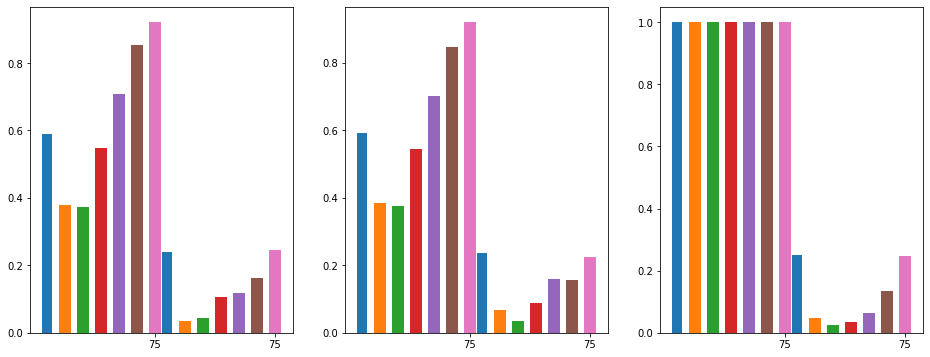

In [24]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [f1_tr0[0], f1_ts0[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
x.bar(height = [f1_tr0[1], f1_ts0[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
x.bar(height = [f1_tr0[2], f1_ts0[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
x.bar(height = [f1_tr0[3], f1_ts0[3]], x = [0 , 1], width=.1, tick_label='16')
x.bar(height = [f1_tr0[4], f1_ts0[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
x.bar(height = [f1_tr0[5], f1_ts0[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
x.bar(height = [f1_tr0[6], f1_ts0[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

y.bar(height = [f1_tr1[0], f1_ts1[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
y.bar(height = [f1_tr1[1], f1_ts1[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
y.bar(height = [f1_tr1[2], f1_ts1[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
y.bar(height = [f1_tr1[3], f1_ts1[3]], x = [0 , 1], width=.1, tick_label='16')
y.bar(height = [f1_tr1[4], f1_ts1[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
y.bar(height = [f1_tr1[5], f1_ts1[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
y.bar(height = [f1_tr1[6], f1_ts1[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

z.bar(height = [f1_tr2[0], f1_ts2[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
z.bar(height = [f1_tr2[1], f1_ts2[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
z.bar(height = [f1_tr2[2], f1_ts2[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
z.bar(height = [f1_tr2[3], f1_ts2[3]], x = [0 , 1], width=.1, tick_label='16')
z.bar(height = [f1_tr2[4], f1_ts2[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
z.bar(height = [f1_tr2[5], f1_ts2[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
z.bar(height = [f1_tr2[6], f1_ts2[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

plt.gcf().set_size_inches((16,6))
plt.show()

En el gráfico anterior podemos ver que clases están siendo más dificiles de predecir, donde claramente notamos que la clase **75** es la más sencilla mientras que la clase **10** es lás con mayor dificultades. Aún con todo esto, notamos la gran diferencia entre datos de entrenamiento y de testing, lo que no da a pensar que estamos en riesgo de overfitting por la gran dimensionalidad de nuestros datos.

Por esto, ahora revisemos la métrica **$R^2$** que debido a ser el coeficiente de determinación nos permitirá tener un conocimiento más profundo sobre la separación de los datos.

In [25]:
r2_tr0 = r2_score(Y_train, pred_rll0_tr_d)
r2_ts0 = r2_score(Y_test, pred_rll0_ts_d)
r2_tr1 = r2_score(Y_train, pred_rll1_tr_d)
r2_ts1 = r2_score(Y_test, pred_rll1_ts_d)
r2_tr2 = r2_score(Y_train, pred_rll2_tr_d)
r2_ts2 = r2_score(Y_test, pred_rll2_ts_d)

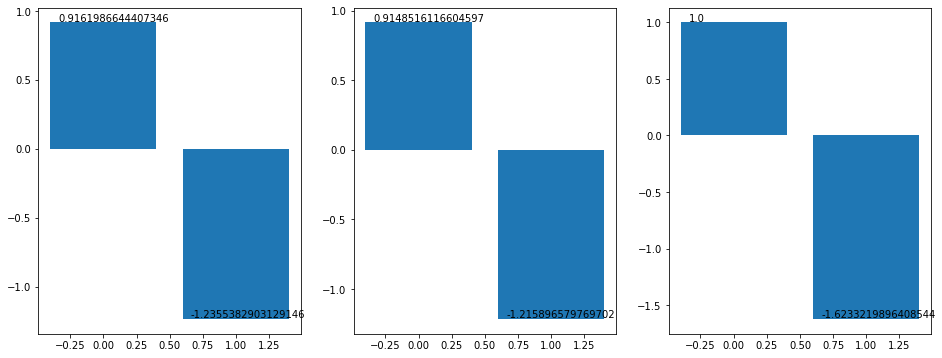

In [26]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [r2_tr0, r2_ts0], x = list(range(2)))
x.text(y = r2_tr0+0.01, x = 0-.34, s = str(r2_tr0))
x.text(y = r2_ts0+0.01, x = 1-.34, s = str(r2_ts0))
y.bar(height = [r2_tr1, r2_ts1], x = list(range(2)))
y.text(y = r2_tr1+0.01, x = 0-.34, s = str(r2_tr1))
y.text(y = r2_ts1+0.01, x = 1-.34, s = str(r2_ts1))
z.bar(height = [r2_tr2, r2_ts2], x = list(range(2)))
z.text(y = r2_tr2+0.01, x = 0-.34, s = str(r2_tr2))
z.text(y = r2_ts2+0.01, x = 1-.34, s = str(r2_ts2))
plt.gcf().set_size_inches((16,6))
plt.show()

Estos resultados nos muestran un **clarisimo** *overfitting*, creado probablemente por la alta dimensionalidad, imposibilitando la capacidad de generalizar. Entonces con esto, realizaremos una selección de atributos basada en los $K$ mayores puntajes sobre una medida. Como medidas utilizaremos *MSE*, *MAE*, *MAPE*. Para entender el comportamiento de los modelos veremos la aplicación de Lasso y Ridge en base a las distintas medidas.

In [27]:
from ipywidgets import interactive, fixed

def train_model(param, Xtr, Xts, Ytr, Yts):
    model = lm.Lasso() 
    model2 = lm.Ridge()
    A = 10**(param)
    print("Param alpha =", A)
    model.set_params(alpha = A)
    model2.set_params(alpha = A)
    model.fit(Xtr, Ytr)
    model2.fit(Xtr, Ytr)
    print('LASSO')
    print("MSE train: ", mean_squared_error(Ytr, model.predict(Xtr)))
    print("MSE test: ", mean_squared_error(Yts, model.predict(Xts)))
    print("MAE train: ", mean_absolute_error(Ytr, model.predict(Xtr)))
    print("MAE test: ", mean_absolute_error(Yts, model.predict(Xts)))
    print("MAPE train: ", mean_absolute_percentage_error(Ytr, model.predict(Xtr)))
    print("MAPE test: ", mean_absolute_percentage_error(Yts, model.predict(Xts)))
    
    print('RIDGE')
    print("MSE train: ", mean_squared_error(Ytr, model2.predict(Xtr)))
    print("MSE test: ", mean_squared_error(Yts, model2.predict(Xts)))
    print("MAE train: ", mean_absolute_error(Ytr, model2.predict(Xtr)))
    print("MAE test: ", mean_absolute_error(Yts, model2.predict(Xts)))
    print("MAPE train: ", mean_absolute_percentage_error(Ytr, model2.predict(Xtr)))
    print("MAPE test: ", mean_absolute_percentage_error(Yts, model2.predict(Xts)))

In [28]:
p_min = -10
p_max = 10

Para número bajos, los valores debiesen coincidir entre grupos, más para valores alto, estos debiesen diferir debido a la información no compartida entre ellos.

**Grupo 0**

In [29]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_0), Xts=fixed(X_std_test_0), Ytr=fixed(Y_train), Yts=fixed(Y_test))

**Grupo 1**

In [30]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_1), Xts=fixed(X_std_test_1), Ytr=fixed(Y_train), Yts=fixed(Y_test))

**Grupo 2**

In [31]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_2), Xts=fixed(X_std_test_2), Ytr=fixed(Y_train), Yts=fixed(Y_test))

De aquí en adelante, como nos especificaron la utilización de *MAPE* como medida de error, será esa la única que analizaremos a menos que se especifique lo contrario.

**Selección de atributos**

In [32]:
def fssrll(x, y, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression()
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            predictions_train = discretize(predictions_train)
            error_candidate = mean_absolute_percentage_error(y, predictions_train)
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("Atributos = %d\n MAPE = %f"%(len(indexes),best_new_score))
    return selected

In [82]:
fss(X_std_train_0, Y_train)

Atributos = 1
 MAPE = 424.650569
Atributos = 2
 MAPE = 377.696314
Atributos = 3
 MAPE = 339.898536
Atributos = 4
 MAPE = 321.219410
Atributos = 5
 MAPE = 306.971490
Atributos = 6
 MAPE = 293.203678
Atributos = 7
 MAPE = 285.991488
Atributos = 8
 MAPE = 281.735827
Atributos = 9
 MAPE = 278.024103
Atributos = 10
 MAPE = 275.787675
Atributos = 11
 MAPE = 274.028041
Atributos = 12
 MAPE = 271.892671
Atributos = 13
 MAPE = 270.822894
Atributos = 14
 MAPE = 269.269509
Atributos = 15
 MAPE = 266.953042
Atributos = 16
 MAPE = 265.134648
Atributos = 17
 MAPE = 262.608806
Atributos = 18
 MAPE = 261.150874
Atributos = 19
 MAPE = 258.030402
Atributos = 20
 MAPE = 256.071352
Atributos = 21
 MAPE = 255.161776
Atributos = 22
 MAPE = 254.339878
Atributos = 23
 MAPE = 254.186830
Atributos = 24
 MAPE = 254.044993
Atributos = 25
 MAPE = 253.345995
Atributos = 26
 MAPE = 252.881504
Atributos = 27
 MAPE = 252.212469
Atributos = 28
 MAPE = 251.822896
Atributos = 29
 MAPE = 251.788499
Atributos = 30
 MAPE = 

KeyboardInterrupt: 

A modo de *insight* dejamos explicitado, que debimos haber utilizado un método embedido para evitar el re-entrenamiento consecutivo. Por otra parte, podemos notar como a partir de los 25 atributos empiezan a tomar notoriamente una convergencia de valores considerando que hasta los 40 atributos, aproximadamente, se termina el decrecimiento y comienza a formarse una cota de convergencia del valor **MAPE**. *Notar que hemos detenido el proceso, mas no fue un error.*

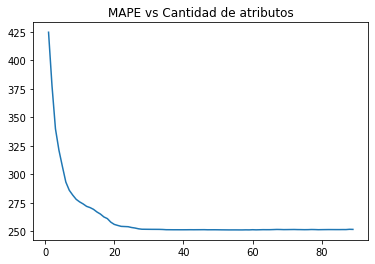

In [33]:
IDX = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89]
VALUES = [424.650569,377.696314,339.898536,321.219410,306.971490,293.203678,285.991488,281.735827,278.024103,275.787675,274.028041,271.892671,270.822894,269.269509,266.953042,265.134648,262.608806,261.150874,258.030402,256.071352,255.161776,254.339878,254.186830,254.044993,253.345995,252.881504,252.212469,251.822896,251.788499,251.756284,251.727713,251.714828,251.697017,251.603380,251.410495,251.389067,251.365597,251.365597,251.356835,251.356835,251.365597,251.401952,251.375121,251.393952,251.409835,251.436019,251.346019,251.357203,251.365188,251.336056,251.294110,251.274333,251.238707,251.238707,251.247250,251.225822,251.223781,251.286638,251.250181,251.396346,251.294890,251.360562,251.441652,251.420224,251.429408,251.519700,251.631060,251.580834,251.486711,251.515283,251.556354,251.590804,251.514691,251.485698,251.429794,251.464079,251.579287,251.528476,251.411342,251.466185,251.498555,251.530176,251.516952,251.502210,251.496588,251.530874,251.521946,251.763213,251.676398]

plt.title('MAPE vs Cantidad de atributos')
plt.plot(IDX, VALUES)
plt.show()

In [92]:
X_train_40_0 = fss(X_std_train_0, Y_train, k=40)

Atributos = 1
 MAPE = 424.650569
Atributos = 2
 MAPE = 377.696314
Atributos = 3
 MAPE = 339.898536
Atributos = 4
 MAPE = 321.219410
Atributos = 5
 MAPE = 306.971490
Atributos = 6
 MAPE = 293.203678
Atributos = 7
 MAPE = 285.991488
Atributos = 8
 MAPE = 281.735827
Atributos = 9
 MAPE = 278.024103
Atributos = 10
 MAPE = 275.787675
Atributos = 11
 MAPE = 274.028041
Atributos = 12
 MAPE = 271.892671
Atributos = 13
 MAPE = 270.822894
Atributos = 14
 MAPE = 269.269509
Atributos = 15
 MAPE = 266.953042
Atributos = 16
 MAPE = 265.134648
Atributos = 17
 MAPE = 262.608806
Atributos = 18
 MAPE = 261.150874
Atributos = 19
 MAPE = 258.030402
Atributos = 20
 MAPE = 256.071352
Atributos = 21
 MAPE = 255.161776
Atributos = 22
 MAPE = 254.339878
Atributos = 23
 MAPE = 254.186830
Atributos = 24
 MAPE = 254.044993
Atributos = 25
 MAPE = 253.345995
Atributos = 26
 MAPE = 252.881504
Atributos = 27
 MAPE = 252.212469
Atributos = 28
 MAPE = 251.822896
Atributos = 29
 MAPE = 251.788499
Atributos = 30
 MAPE = 

In [93]:
X_test_40_0 = X_std_test_0[:,X_train_40_0]
X_train_40_0 = X_std_train_0[:,X_train_40_0]
model_rll0 = lm.LinearRegression()
predictions_test = model_rll0.fit(X_train_40_0, Y_train).predict(X_test_40_0)
predictions_test = discretize(predictions_test)
error_candidate = mean_absolute_percentage_error(Y_test, predictions_test)

In [94]:
print (error_candidate)

299.36384687208215


In [96]:
accuracy_score(Y_test, predictions_test)

0.19142857142857142

Bastante malo realmente. Quizás no es la forma de acercarnos a este problema. O bien la representación no está siendo de utilidad.

### Regresión Logística

En base a todo lo que ya hemos realizado, y para hacer honor al tiempo, la regresión logística la realizaremos **LogisticRegression**, con *penalty=l2*, utilizaremos además un gradiente estocástico para resolver estos problemas.

In [34]:
Y_train_prima = Y_train.T[0].T

In [35]:
model_rlg0 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=1, max_iter=1000).fit(X_std_train_0, Y_train_prima)

B:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [57]:
model_rlg1 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=100).fit(X_std_train_1, Y_train_prima)

B:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
model_rlg2 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=100).fit(X_std_train_2, Y_train_prima)

B:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [58]:
print ('Modelo 0 - Train:', model_rlg0.score(X_std_train_0, Y_train))
print ('Modelo 1 - Train:', model_rlg1.score(X_std_train_1, Y_train))
print ('Modelo 2 - Train:', model_rlg2.score(X_std_train_2, Y_train))
print ('Modelo 0 - Test:', model_rlg0.score(X_std_test_0, Y_test))
print ('Modelo 1 - Test:', model_rlg1.score(X_std_test_1, Y_test))
print ('Modelo 2 - Test:', model_rlg2.score(X_std_test_2, Y_test))

Modelo 0 - Train: 0.9362857142857143
Modelo 1 - Train: 0.648
Modelo 2 - Train: 0.7414285714285714
Modelo 0 - Test: 0.3466666666666667
Modelo 1 - Test: 0.38857142857142857
Modelo 2 - Test: 0.439047619047619


Utilizaremos la técnica de reducción de dimensionalidad **PCA** para representar los datos en menor cantidad de dimensiones.

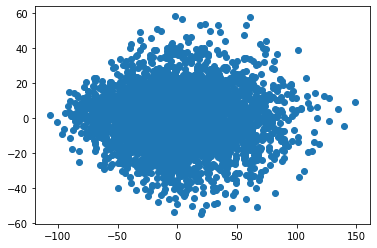

In [59]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(X_std_train_2)
X_pca_train = pca_model.transform(X_std_train_2)
X_pca_test = pca_model.transform(X_std_test_2)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

Podemos notar como los datos no pareciesen estar separados por ningún tipo de conjunto, más bien pareciera que todos estuviesen en el mismo lugar, eso quiere decir que la información que estamos entregando o bien, no es lo suficientemente representativa o bien los atributos que entregamos no están generando un entendimiento sobre los datos para resolver el problema. Bajar a esta cantidad de dimensiones no nos permitirá conocer un resultado correcto.

In [70]:
maximo = 0
for i in range(2, 101):
    pca_model = PCA(n_components=i)
    pca_model.fit(X_std_train_2)
    X_pca_train = pca_model.transform(X_std_train_2)
    X_pca_test = pca_model.transform(X_std_test_2)
    model_PCA = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=500).fit(X_pca_train, Y_train_prima)
    score = model_PCA.score(X_pca_train, Y_train_prima)
    if (score > maximo):
        maximo = score
        d = i
        model_PCA_max = model_PCA

In [71]:
pca_model = PCA(n_components=d)
pca_model.fit(X_std_train_2)
X_pca_train = pca_model.transform(X_std_train_2)
X_pca_test = pca_model.transform(X_std_test_2)
score = np.mean([model_PCA_max.score(X_pca_test, Y_test.T[0].T) for i in range(10)])
print ('Modelo con {0} atributos - Score: {1}'.format(d,score))

Modelo con 98 atributos - Score: 0.399047619047619


Si consideramos que usamos el grupo 2, el cual tienen todos los datos, reducir su dimensionalidad a 98 atributos no se aleja mucho de la realizad obtenida en la regresión lineal.

### Perceptron


In [72]:
classifier0 = lm.Perceptron(tol=1e-3)
classifier1 = lm.Perceptron(tol=1e-3)
classifier2 = lm.Perceptron(tol=1e-3)
classifierPCA = lm.Perceptron(tol=1e-3)

In [75]:
classifier0=classifier0.fit(X_std_train_0, Y_train_prima)
classifier1=classifier1.fit(X_std_train_1, Y_train_prima)
classifier2=classifier2.fit(X_std_train_2, Y_train_prima)
classifierPCA=classifierPCA.fit(X_pca_train, Y_train_prima)

In [77]:
ppred0 = classifier0.predict(X_std_test_0)
ppred1 = classifier1.predict(X_std_test_1)
ppred2 = classifier2.predict(X_std_test_2)
ppredPCA = classifierPCA.predict(X_pca_test)

In [83]:
PMAPE0 = mean_absolute_percentage_error(ppred0, Y_test)
PACC0 = accuracy_score(ppred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC0, PMAPE0))

Accuracy: 0.32666666666666666
MAPE: 3641.904039901675


In [84]:
PMAPE1 = mean_absolute_percentage_error(ppred1, Y_test)
PACC1 = accuracy_score(ppred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC1, PMAPE1))

Accuracy: 0.32666666666666666
MAPE: 3863.712483660131


In [85]:
PMAPE2 = mean_absolute_percentage_error(ppred2, Y_test)
PACC2 = accuracy_score(ppred2, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC2, PMAPE2))

Accuracy: 0.38666666666666666
MAPE: 4950.313194039522


In [86]:
PMAPEPCA = mean_absolute_percentage_error(ppredPCA, Y_test)
PACCPCA = accuracy_score(ppredPCA, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACCPCA, PMAPEPCA))

Accuracy: 0.3142857142857143
MAPE: 3399.5800173402686


### MultiLayer Perceptron

In [87]:
from sklearn import neural_network as nn

In [99]:
mlpc0 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc0.fit(X_std_train_0, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [100]:
mlpc1 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc1.fit(X_std_train_1, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [101]:
mlpc2 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc2.fit(X_std_train_2, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
mlpcpca = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpcpca.fit(X_pca_train, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
MLPpred0 = mlpc0.predict(X_std_test_0)
mlpmape0 = mean_absolute_percentage_error(MLPpred0, Y_test)
mlpacc0 = accuracy_score(MLPpred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc0, mlpmape0))

Accuracy: 0.3780952380952381
MAPE: 4184.160561748509


In [105]:
MLPpred1 = mlpc1.predict(X_std_test_1)
mlpmape1 = mean_absolute_percentage_error(MLPpred1, Y_test)
mlpacc1 = accuracy_score(MLPpred1, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc1, mlpmape1))

Accuracy: 0.36952380952380953
MAPE: 3569.2552468606486


In [106]:
MLPpred2 = mlpc2.predict(X_std_test_2)
mlpmape2 = mean_absolute_percentage_error(MLPpred2, Y_test)
mlpacc2 = accuracy_score(MLPpred2, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc2, mlpmape2))

Accuracy: 0.4085714285714286
MAPE: 4582.329746565293


In [108]:
MLPpredpca = mlpcpca.predict(X_pca_test)
mlpmapepca = mean_absolute_percentage_error(MLPpredpca, Y_test)
mlpaccpca = accuracy_score(MLPpredpca, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpaccpca, mlpmapepca))

Accuracy: 0.3657142857142857
MAPE: 4171.19810972008
